# Prediction of a drug molecule properties

## Introduction

The prediction of a drug molecule properties plays an important role in the drug design process. The molecule properties are the cause of failure for 60% of all drugs in the clinical phases. A multi parameters optimization using machine learning methods can be used to choose an optimized molecule to be subjected to more extensive studies and to avoid any clinical phase failure.

The objective of this project is to develop multiple deep learning models to predict one or more basic properties of a molecule using its fingerprint features.


## I. Import Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import gridspec
%matplotlib inline
import servier.src.config as config
import servier.src.main as main
from sklearn.metrics import  accuracy_score, confusion_matrix
from keras.models import load_model

## II - Exploratory Data Analysis

Let's start creating statistics and visualizations on my dataset to identify good columns for modeling, potential data quality issues and anticipate potential feature transformations necessary...

### II.1 Import Data

In [2]:
X,y,df = main.read_data(data_path=config.path_single, col_smiles='smiles', col_target=config.COL_TARGET_SINGLE)
print(df.columns)
df.head()

Index(['P1', 'mol_id', 'smiles'], dtype='object')


,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


### II.2 Missing Values and syntax error

In [3]:
# Print the shape of the data
print("Type of features:")
print(df.dtypes)
print("Shape of data:")
print(df.shape)
print("Descriptive statistics of numerical features:")
print(df.describe())

Type of features:
P1         int64
mol_id    object
smiles    object
dtype: object
Shape of data:
(4999, 3)
Descriptive statistics of numerical features:
                P1
count  4999.000000
mean      0.821764
std       0.382749
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000


In [4]:
# Now let's check to see if there are any NaN or missing values
# Percent missing values per columns
(df.isna().sum()/df.shape[0])*100

P1        0.0
mol_id    0.0
smiles    0.0
dtype: float64

No missing data ...

In [5]:
# Duplicates after handling missing values
df[df.duplicated()].shape[0]

0

No duplicated entries

In [6]:
# Check unique values in variables
print("Number of unique molecule ID in the dataset:", df['mol_id'].nunique())
print("Number of unique Smiles in the dataset:", df['smiles'].nunique())
print("Number of unique P1 values in the dataset:", df['P1'].nunique())

Number of unique molecule ID in the dataset: 4999
Number of unique Smiles in the dataset: 4999
Number of unique P1 values in the dataset: 2


In [7]:
# Target variable values distribution
df['P1'].value_counts()*100/df.shape[0]

1    82.176435
0    17.823565
Name: P1, dtype: float64

We remark that 17.8% only of the entries are considered of property P1 = 0 and 82.2% of property P1 = 1. 

That's mean the our dataset is unbalanced, which may have negative consequences later!!!

### II.3 Visualization

c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Distribution')

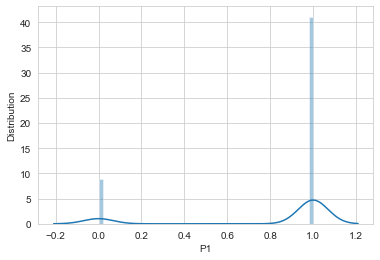

In [8]:
# Univariate visualization
# Distribution of average_seconds_played
P1 = [df['P1'].values]
plt.figure(figsize=(6,4))
sns.distplot(P1)
plt.xlabel('P1')
plt.ylabel('Distribution')

## III. Modeling and evaluation

We recall the goal of this project to develop a best suited algorithm to predict the class of one or more molecule properties.

### III.1 Model 1: Feed Frward Neural Network
This model takes the extracted features of a molecule as input and predict the P1 property. We use the function *fingerprint_features* of the
*feature_extractor.py* module to extract the features from a molecule smile. The output of this module is a vector of size **2048** that we will use as an input for our models. We concatenate this vector to the dataset for each entry (molecule).

In [9]:
X_test, y_test, model, history = main.Train(model_type = 'FF')

 Train a one dimensional classification model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32784     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 34,221
Trainable params: 34,221
Non-trainable params: 0
______

c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
125/125 - 2s - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6936 - val_accuracy: 0.1760

Epoch 00001: saving model to servier/models\FF.h5
Epoch 2/100
125/125 - 0s - loss: 0.6728 - accuracy: 0.5094 - val_loss: 0.6999 - val_accuracy: 0.5570

Epoch 00002: saving model to servier/models\FF.h5
Epoch 3/100
125/125 - 0s - loss: 0.5595 - accuracy: 0.7119 - val_loss: 0.5854 - val_accuracy: 0.6910

Epoch 00003: saving model to servier/models\FF.h5
Epoch 4/100
125/125 - 0s - loss: 0.4833 - accuracy: 0.7589 - val_loss: 0.5282 - val_accuracy: 0.7290

Epoch 00004: saving model to servier/models\FF.h5
Epoch 5/100
125/125 - 0s - loss: 0.4144 - accuracy: 0.8065 - val_loss: 0.6286 - val_accuracy: 0.6730

Epoch 00005: saving model to servier/models\FF.h5
Epoch 6/100
125/125 - 0s - loss: 0.3487 - accuracy: 0.8365 - val_loss: 0.6223 - val_accuracy: 0.7240

Epoch 00006: saving model to servier/models\FF.h5
Epoch 7/100
125/125 - 0s - loss: 0.2947 - accuracy: 0.8597 - val_loss: 0.6897 - val_accu

In [10]:
y_pred = main.Predict(X_test, model_type = 'FF')

In [11]:
data_test = 'servier/data/dataset_single_test.csv'
y_pred_2 = main.Predict(data_test, model_type = 'FF')

In [12]:
model_eval_ff = main.Evaluate(y_test, y_pred)
model_eval_ff

,accuracy,f1-score,Confusion Matrix
0,0.729,0.589463,"[[73, 103], [168, 656]]"


Test Data Accuracy: 0.7290


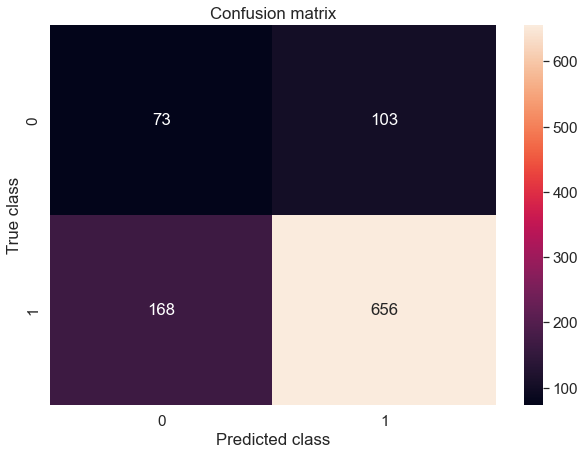

In [13]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### III.1 Model 2: 
This model takes the smile string character as input and predict the P1 property.In this work, a Deep Learning model that automatically learns features from *smiles* to predict chemical properties, without the need for additional explicit feature engineering.

### CNN model

In [14]:
X_test, y_test, model, history = main.Train(model_type = 'cnn')

 Train a one dimensional classification model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 74, 50)            1500      
_________________________________________________________________
conv1d (Conv1D)              (None, 65, 192)           96192     
_________________________________________________________________
batch_normalization (BatchNo (None, 65, 192)           768       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 63, 192)           110784    
_________________________________________________________________
flatten (Flatten)            (None, 12096)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1548416   
_________________________________________________________________
dropout_

c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


125/125 - 8s - loss: 0.6926 - accuracy: 0.5869 - val_loss: 0.7021 - val_accuracy: 0.2080

Epoch 00001: saving model to servier/models\cnn.h5
Epoch 2/100
125/125 - 6s - loss: 0.6016 - accuracy: 0.6532 - val_loss: 0.6641 - val_accuracy: 0.7360

Epoch 00002: saving model to servier/models\cnn.h5
Epoch 3/100
125/125 - 6s - loss: 0.5669 - accuracy: 0.6874 - val_loss: 0.6389 - val_accuracy: 0.7400

Epoch 00003: saving model to servier/models\cnn.h5
Epoch 4/100
125/125 - 7s - loss: 0.5120 - accuracy: 0.7189 - val_loss: 0.5767 - val_accuracy: 0.7210

Epoch 00004: saving model to servier/models\cnn.h5
Epoch 5/100
125/125 - 7s - loss: 0.4490 - accuracy: 0.7754 - val_loss: 0.5111 - val_accuracy: 0.7500

Epoch 00005: saving model to servier/models\cnn.h5
Epoch 6/100
125/125 - 6s - loss: 0.3627 - accuracy: 0.8237 - val_loss: 0.6053 - val_accuracy: 0.6880

Epoch 00006: saving model to servier/models\cnn.h5
Epoch 7/100
125/125 - 7s - loss: 0.2723 - accuracy: 0.8745 - val_loss: 0.8178 - val_accuracy: 

In [15]:
y_pred = main.Predict(X_test, model_type = 'cnn')

In [16]:
model_eval_cnn = main.Evaluate(y_test, y_pred)
model_eval_cnn

,accuracy,f1-score,Confusion Matrix
0,0.75,0.559111,"[[46, 132], [118, 704]]"


Test Data Accuracy: 0.7500


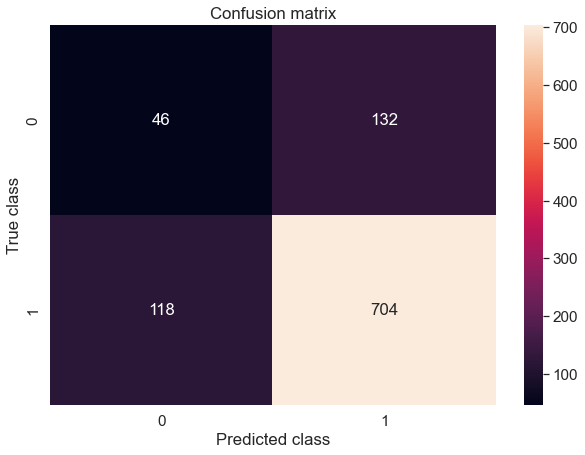

In [17]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### LSTM model 

In [18]:
X_test, y_test, model, history = main.Train(model_type = 'lstm')

 Train a one dimensional classification model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 74, 50)            1500      
_________________________________________________________________
bidirectional (Bidirectional (None, 74, 256)           183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 612,061
Trainable params: 612,061
Non-trainable params: 0
__

c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


125/125 - 58s - loss: 0.6847 - accuracy: 0.5984 - val_loss: 0.7970 - val_accuracy: 0.4600

Epoch 00001: saving model to servier/models\lstm.h5
Epoch 2/100
125/125 - 38s - loss: 0.6808 - accuracy: 0.4916 - val_loss: 0.6908 - val_accuracy: 0.5520

Epoch 00002: saving model to servier/models\lstm.h5
Epoch 3/100
125/125 - 37s - loss: 0.6484 - accuracy: 0.6227 - val_loss: 1.1192 - val_accuracy: 0.2550

Epoch 00003: saving model to servier/models\lstm.h5
Epoch 4/100
125/125 - 41s - loss: 0.6323 - accuracy: 0.6337 - val_loss: 0.7646 - val_accuracy: 0.4950

Epoch 00004: saving model to servier/models\lstm.h5
Epoch 5/100
125/125 - 33s - loss: 0.6331 - accuracy: 0.6499 - val_loss: 0.7884 - val_accuracy: 0.4870

Epoch 00005: saving model to servier/models\lstm.h5
Epoch 6/100
125/125 - 33s - loss: 0.6261 - accuracy: 0.6549 - val_loss: 0.7131 - val_accuracy: 0.5550

Epoch 00006: saving model to servier/models\lstm.h5
Epoch 7/100
125/125 - 34s - loss: 0.6237 - accuracy: 0.6614 - val_loss: 0.7675 - v

In [21]:
y_pred = main.Predict(X_test, model_type = 'lstm')

In [22]:
model_eval_lstm = main.Evaluate(y_test, y_pred)
model_eval_lstm

,accuracy,f1-score,Confusion Matrix
0,0.719,0.610949,"[[96, 82], [199, 623]]"


Test Data Accuracy: 0.7190


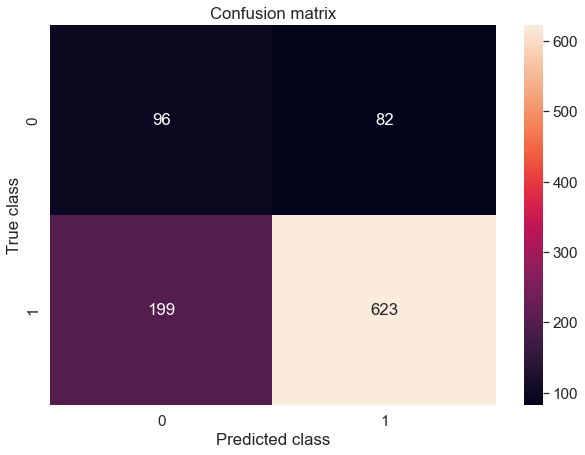

In [23]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### GRU Model 

In [24]:
X_test, y_test, model, history = main.Train(model_type = 'gru')

 Train a one dimensional classification model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 74, 50)            1500      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 74, 256)           138240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               296448    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 469,213
Trainable params: 469,213
Non-trainable params: 0
__

c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


125/125 - 47s - loss: 0.6991 - accuracy: 0.5561 - val_loss: 0.6358 - val_accuracy: 0.7630

Epoch 00001: saving model to servier/models\gru.h5
Epoch 2/100
125/125 - 31s - loss: 0.6767 - accuracy: 0.5986 - val_loss: 0.6249 - val_accuracy: 0.6910

Epoch 00002: saving model to servier/models\gru.h5
Epoch 3/100
125/125 - 28s - loss: 0.6560 - accuracy: 0.6342 - val_loss: 0.6491 - val_accuracy: 0.6430

Epoch 00003: saving model to servier/models\gru.h5
Epoch 4/100
125/125 - 28s - loss: 0.6339 - accuracy: 0.6479 - val_loss: 0.6659 - val_accuracy: 0.5910

Epoch 00004: saving model to servier/models\gru.h5
Epoch 5/100
125/125 - 30s - loss: 0.6210 - accuracy: 0.6372 - val_loss: 0.7068 - val_accuracy: 0.5540

Epoch 00005: saving model to servier/models\gru.h5
Epoch 6/100
125/125 - 28s - loss: 0.6161 - accuracy: 0.6439 - val_loss: 0.6633 - val_accuracy: 0.5710

Epoch 00006: saving model to servier/models\gru.h5
Epoch 7/100
125/125 - 28s - loss: 0.6056 - accuracy: 0.6514 - val_loss: 0.5781 - val_acc

In [27]:
y_pred = main.Predict(X_test, model_type = 'gru')

In [28]:
model_eval_lstm = main.Evaluate(y_test, y_pred)
model_eval_lstm

,accuracy,f1-score,Confusion Matrix
0,0.762,0.587879,"[[56, 122], [116, 706]]"


Test Data Accuracy: 0.7620


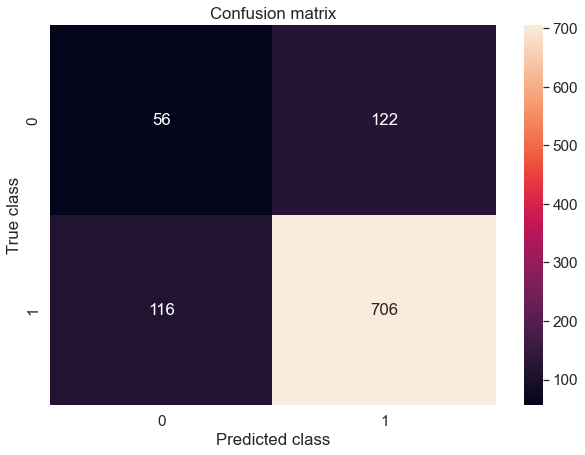

In [29]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### III.1 Model 3: 

Finally, I will work on an extension of Model 1 to predict the **P1, P2,...,P9** properties of the *dataset_multi.csv* dataset.

In [30]:
import os
from keras import callbacks
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

model_type='lstm'
# Load and split  dataset
smiles, y, df = main.read_data(config.path_multi, col_smiles='smiles', col_target=config.COL_TARGET_MULTI)
tokens, num_words, max_phrase_len = main.generate_tokens(smiles, len_percentile=100)
X_train, X_test, y_train, y_test = train_test_split(tokens, y, test_size=0.2, random_state=0)

print(' Train multi-dimensional classification model')
model = main.create_model(model_type='FF', num_words = num_words, input_length=max_phrase_len, output_dim=9, dropout_rate=config.dropout_rate)

 Train multi-dimensional classification model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                1200      
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 9)                 225       
Total params: 2,837
Trainable params: 2,837
Non-trainable params: 0
______

In [31]:

# Callback list
callback_list = []
# monitor val_loss and terminate training if no improvement
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=50, verbose=2, mode='auto', restore_best_weights=True)
callback_list.append(early_stop)

# Train only classification head
optimizer = Adam(lr=config.lr, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

models_folder = 'servier/models'
os.makedirs(models_folder, exist_ok=True)

checkpointer = ModelCheckpoint(os.path.join(models_folder,'lstm' + '_multi.h5'), monitor='val_acc', verbose=1, save_weights_only=False, save_best_only=False, mode='auto') 
callback_list.append(checkpointer)
        
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=config.nb_epochs, callbacks=callback_list, verbose=2)


c:\Users\Halrachid\Anaconda3\envs\servier\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
125/125 - 2s - loss: 0.5137 - accuracy: 0.2908 - val_loss: 0.4527 - val_accuracy: 0.0000e+00

Epoch 00001: saving model to servier/models\lstm_multi.h5
Epoch 2/100
125/125 - 0s - loss: 0.4526 - accuracy: 0.0040 - val_loss: 0.4531 - val_accuracy: 0.0000e+00

Epoch 00002: saving model to servier/models\lstm_multi.h5
Epoch 3/100
125/125 - 0s - loss: 0.4527 - accuracy: 0.0020 - val_loss: 0.4513 - val_accuracy: 0.0000e+00

Epoch 00003: saving model to servier/models\lstm_multi.h5
Epoch 4/100
125/125 - 0s - loss: 0.4496 - accuracy: 0.0038 - val_loss: 0.4510 - val_accuracy: 0.0320

Epoch 00004: saving model to servier/models\lstm_multi.h5
Epoch 5/100
125/125 - 0s - loss: 0.4507 - accuracy: 0.0098 - val_loss: 0.4505 - val_accuracy: 0.0000e+00

Epoch 00005: saving model to servier/models\lstm_multi.h5
Epoch 6/100
125/125 - 0s - loss: 0.4506 - accuracy: 0.1048 - val_loss: 0.4512 - val_accuracy: 0.0000e+00

Epoch 00006: saving model to servier/models\lstm_multi.h5
Epoch 7/100
125/125 

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype('uint8')

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print('Accuracy=', accuracy_score(y_test, y_pred))
print('F1 score=', f1_score(y_test, y_pred, labels=None, average='macro', sample_weight=None))


Accuracy= 0.281
F1 score= 0.9092097692818741


The model is not very performant and it needs optimisation and more data to support high dimension requirements.